In [1]:
import pandas as pd
import numpy as np
from plotnine import *

# 심슨의 역설

`-` 버클리대학교의 입학데이터
- https://github.com/guebin/DV2022/blob/master/_notebooks/ds.pdf

- 주장: 버클리대학에 gender bias가 존재한다.

`-` 1973년 가을학기의 입학통계에 따르면 지원하는 남성이 여성보다 훨씬 많이 합격했고, 그 차이가 너무 커서 우연의 일치라 보기 어렵다.

In [36]:
df=pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson.csv",index_col=0,header=[0,1])\
.stack().stack().reset_index().rename({'level_0':'department','level_1':'result','level_2':'gender',0:'count'},axis=1)
df

,department,result,gender,count
0,A,fail,female,19
1,A,fail,male,314
2,A,pass,female,89
3,A,pass,male,511
4,B,fail,female,7
5,B,fail,male,208
6,B,pass,female,18
7,B,pass,male,352
8,C,fail,female,391
9,C,fail,male,204


## 시각화1: 전체합격률

`-` df1

In [33]:
(df.query('gender=="female" and result=="fail"')['count']).sum()

1063

In [37]:
df.groupby(['gender', 'result']).agg({'count':np.sum}).reset_index()

,gender,result,count
0,female,fail,1063
1,female,pass,772
2,male,fail,1291
3,male,pass,1400


`-` df11

In [39]:
df.groupby('gender').agg({'count':np.sum}).reset_index()

,gender,count
0,female,1835
1,male,2691


- df1과 df2를 합치자

`-` merge: 두개의 데이터프레임을 합친다.

In [42]:
_df1=df.groupby(['gender', 'result']).agg({'count':np.sum}).reset_index()
_df2=df.groupby('gender').agg({'count':np.sum}).reset_index()
pd.merge(_df1,_df2)

# _df1과 _df2의 count변수명이 다르기 때문에 아래와 같이 아무것도 안나옴

,gender,result,count


In [43]:
df.groupby('gender').agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1)

,gender,count2
0,female,1835
1,male,2691


`-` merge 방법 1

In [44]:
_df1=df.groupby(['gender', 'result']).agg({'count':np.sum}).reset_index()
_df2=df.groupby('gender').agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1)
pd.merge(_df1,_df2)

,gender,result,count,count2
0,female,fail,1063,1835
1,female,pass,772,1835
2,male,fail,1291,2691
3,male,pass,1400,2691


`-` merge 방법2

In [45]:
df.groupby(['gender', 'result']).agg({'count':np.sum}).reset_index()\
.merge(df.groupby('gender').agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))

,gender,result,count,count2
0,female,fail,1063,1835
1,female,pass,772,1835
2,male,fail,1291,2691
3,male,pass,1400,2691


`-` 비율계산

In [46]:
df.groupby(['gender', 'result']).agg({'count':np.sum}).reset_index()\
.merge(df.groupby('gender').agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))\
.eval('rate = count/count2')

,gender,result,count,count2,rate
0,female,fail,1063,1835,0.579292
1,female,pass,772,1835,0.420708
2,male,fail,1291,2691,0.479747
3,male,pass,1400,2691,0.520253


`-` 시각화

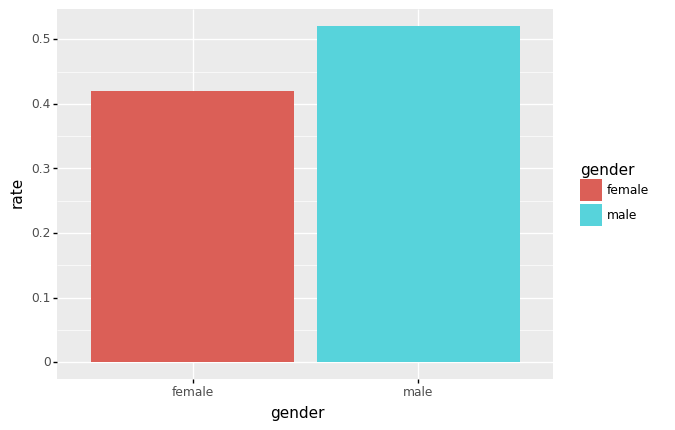

<ggplot: (8761232133521)>

In [51]:
data1=df.groupby(['gender', 'result']).agg({'count':np.sum}).reset_index()\
.merge(df.groupby('gender').agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))\
.eval('rate = count/count2')
ggplot(data1.query('result == "pass"'))+geom_col(aes(x='gender',fill='gender',y='rate'))

`-` 결론: 남자의 합격률이 더 높다. $\to$ 성차별?

## 시각화2: 학과별 합격률

`-` df2

In [57]:
df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1)

,department,gender,count2
0,A,female,108
1,A,male,825
2,B,female,25
3,B,male,560
4,C,female,593
5,C,male,325
6,D,female,375
7,D,male,417
8,E,female,393
9,E,male,191


`-` merge

In [58]:
df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1)\
.merge(df)

,department,gender,count2,result,count
0,A,female,108,fail,19
1,A,female,108,pass,89
2,A,male,825,fail,314
3,A,male,825,pass,511
4,B,female,25,fail,7
5,B,female,25,pass,18
6,B,male,560,fail,208
7,B,male,560,pass,352
8,C,female,593,fail,391
9,C,female,593,pass,202


- 위와 같은 거긴 한데 count 뒤로 보내려고 아래와 같이 작성

In [60]:
data2=df.merge(df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))\
.eval('rate=count/count2')
data2

,department,result,gender,count,count2,rate
0,A,fail,female,19,108,0.175926
1,A,pass,female,89,108,0.824074
2,A,fail,male,314,825,0.380606
3,A,pass,male,511,825,0.619394
4,B,fail,female,7,25,0.280000
5,B,pass,female,18,25,0.720000
6,B,fail,male,208,560,0.371429
7,B,pass,male,352,560,0.628571
8,C,fail,female,391,593,0.659359
9,C,pass,female,202,593,0.340641


`-` 시각화

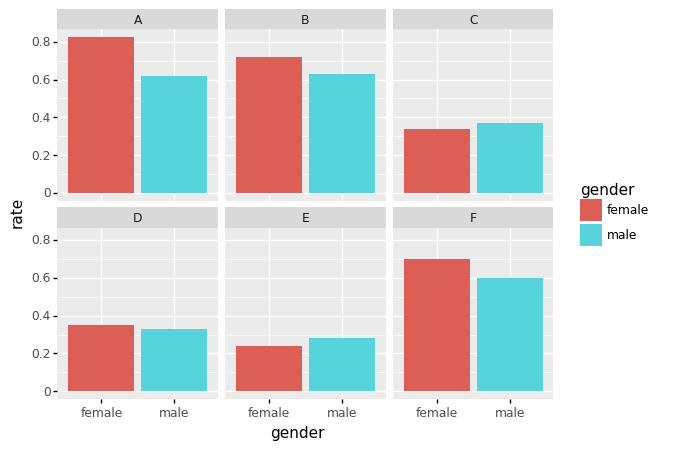

<ggplot: (8761230954277)>

In [63]:
ggplot(data2.query('result=="pass"'))+geom_col(aes(x='gender',fill='gender',y='rate'))\
+facet_wrap('department')

- 학과별로 살펴보니 A,B,D,F는 여성 합격률이 더 높다.

`-` 교재설명: 여성의 합격률이 낮은 학과(인기있는 학과)에만 많이 지원하였기 때문

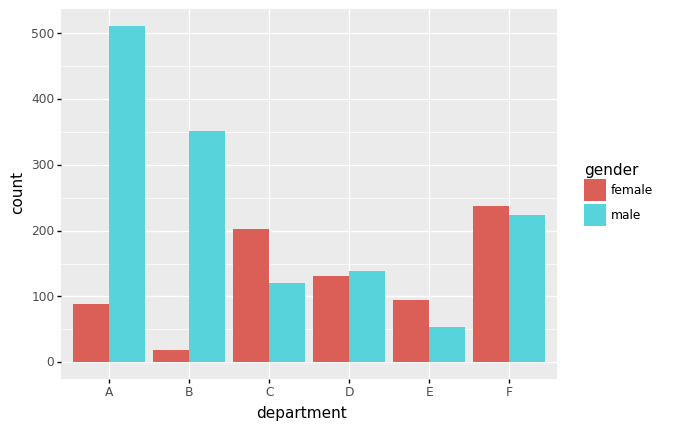

<ggplot: (8761230699317)>

In [69]:
ggplot(data2.query('result=="pass"'))+geom_col(aes(x='department',fill='gender',y='count'),\
position='dodge')

- 살펴보니 합격률이 높은 A,B학과의 경우 상대적으로 남성이 많이 지원하였음. 합격률이 낮은 C,D학과는 상대적으로 여성이 많이 지원함. D,F의 지원수는 비슷


# HW

In [70]:
df = pd.read_csv("https://raw.githubusercontent.com/guebin/DV2022/master/posts/Simpson2.csv")
df

,department,result,gender,count
0,A,fail,female,0
1,A,fail,male,100
2,A,pass,female,1
3,A,pass,male,900
4,B,fail,female,400
5,B,fail,male,1
6,B,pass,female,600
7,B,pass,male,1


## 시각화1: 남녀합격률 시각화

In [77]:
df.groupby(['gender']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1)

,gender,count2
0,female,1001
1,male,1002


In [85]:
datahw=df.groupby(['gender']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1)\
.merge(df).eval('rate = count/count2')
datahw

,gender,count2,department,result,count,rate
0,female,1001,A,fail,0,0.000000
1,female,1001,A,pass,1,0.000999
2,female,1001,B,fail,400,0.399600
3,female,1001,B,pass,600,0.599401
4,male,1002,A,fail,100,0.099800
5,male,1002,A,pass,900,0.898204
6,male,1002,B,fail,1,0.000998
7,male,1002,B,pass,1,0.000998


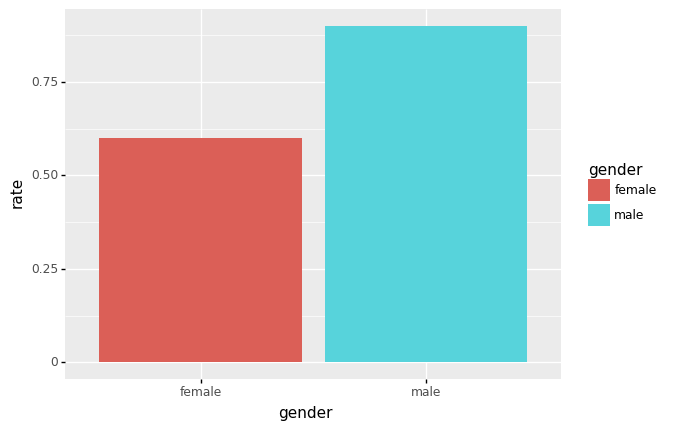

<ggplot: (8761230608089)>

In [87]:
ggplot(datahw.query('result=="pass"'))+geom_col(aes(x='gender',fill='gender',y='rate'))

## 시각화2: 학과별 남녀합격률 시각화

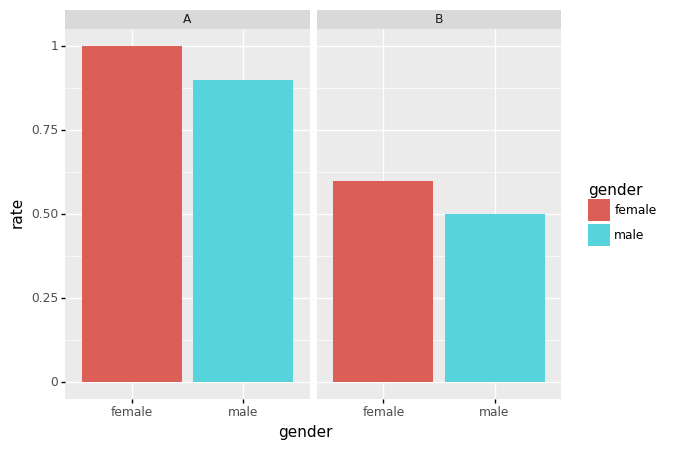

<ggplot: (8761230576213)>

In [88]:
datahw2=df.merge(df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1))\
.eval('rate = count/count2')
ggplot(datahw2.query('result=="pass"'))+geom_col(aes(x='gender',fill='gender',y='rate'))\
+facet_wrap('department')

- A학과: 쓰면 거의 붙는 학과
- B학과: 쓰면 반정도 붙는 학과

## 시각화3: 학과별 지원자 수 시각화

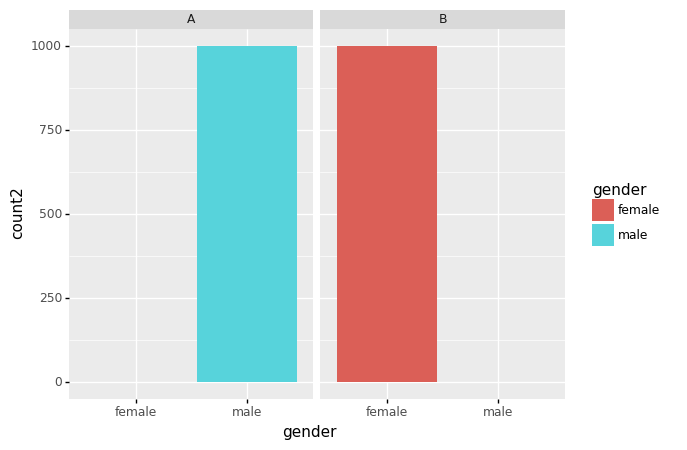

<ggplot: (8761230548765)>

In [96]:
datahw3=df.groupby(['department','gender']).agg({'count':np.sum}).reset_index().rename({'count':'count2'},axis=1)

ggplot(datahw3)+geom_col(aes(x='gender',fill='gender',y='count2'))+facet_wrap('department')

- 여학생은 쓰면 붙는 A학과에는 거의 지원안함, 대신에 쓰면 반정도 붙는 B학과에 대부분 지원함